## Loading the data

In [14]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

In [88]:
# Loading the dataset
df=pd.read_csv("cord19_df.csv")

/Users/deepaknadipelly/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Printing the head of the dataframe
df.head()

paper_id  \
0  3cdc48bb9e40afd30a59463b7872761a726998c8   
1  d99acb4e99be7852aa61a688c9fbd38d44b5a252   
2  748d4c57fe1acc8d9d97cf574f7dea5296f9386c   
3  b891efc6e1419713b05ff7d89b26d260478c28df   
4  353852971069ad5794445e5c1ab6077ce23da75d   

                                           body_text  \
0  NDV (Roakin strain) was obtained from Dr. D. J...   
1  Live attenuated viruses have been developed an...   
2  Ebola virus (EBOV) and other members of the fa...   
3  To the Editor:\nChina has the world's second l...   
4  Coronavirus disease 2019 (COVID-19) has spread...   

                                             methods  \
0  NDV (Roakin strain) was obtained from Dr. D. J...   
1  RSV A2 strain was obtained from ATCC (Manassas...   
2  U2OS human osteosarcoma cells were cultured in...   
3                                                NaN   
4                                                NaN   

                                             results source  \
0  Adult house flies harbored Newcastle Disease v...    PMC   
1  The reverse genetics system for measles Edmons...    PMC   
2  For evaluating EBOV GP triggering under biosaf...    PMC   
3                                                NaN    PMC   
4                                                NaN    NaN   

                                               title  \
0  Experimental Evaluation of Musca domestica (Di...   
1  Evaluation of Measles Vaccine Virus as a Vecto...   
2  Direct Visualization of Ebola Virus Fusion Tri...   
3  Tuberculosis prevention in healthcare workers ...   
4                                                NaN   

                           doi  \
0     10.1093/jmedent/44.4.666   
1  10.2174/1874357901206010012   
2        10.1128/mbio.01857-15   
3  10.1183/23120541.00015-2015   
4                          NaN   

                                            abstract publish_time  \
0  House flies, Musca domestica L. (Diptera: Musc...   2007-07-01   
1  Live attenuated recombinant measles vaccine vi...   2012-02-16   
2  Ebola virus (EBOV) makes extensive and intrica...   2016-02-09   
3  BSL3 and respiratory isolation wards protect h...   2015-08-21   
4                                                NaN          NaN   

                                             authors        journal arxiv_id  \
0  Watson, D. Wes; Niño, Elina L.; Rochon, Katery...  J Med Entomol      NaN   
1  Mok, Hoyin; Cheng, Xing; Xu, Qi; Zengel, James...   Open Virol J      NaN   
2  Spence, Jennifer S.; Krause, Tyler B.; Mittler...           mBio      NaN   
3  Deng, Yunfeng; Li, Yan; Wang, Fengtian; Gao, D...   ERJ Open Res      NaN   
4                                                NaN            NaN      NaN   

                                                 url  publish_year  \
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...          2007   
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...          2012   
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...          2016   
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...          2015   
4                                                NaN            -1   

   is_covid19                        study_design  
0       False                                  []  
1       False  ['truncated', 'gamma', 'protocol']  
2       False      ['truncated', 'heterogeneity']  
3       False                                  []  
4        True                                  []

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47110 entries, 0 to 47109
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   paper_id      47110 non-null  object
 1   body_text     47110 non-null  object
 2   methods       19579 non-null  object
 3   results       16967 non-null  object
 4   source        42227 non-null  object
 5   title         42192 non-null  object
 6   doi           41172 non-null  object
 7   abstract      41062 non-null  object
 8   publish_time  42227 non-null  object
 9   authors       41609 non-null  object
 10  journal       38536 non-null  object
 11  arxiv_id      621 non-null    object
 12  url           42108 non-null  object
 13  publish_year  47110 non-null  int64 
 14  is_covid19    47110 non-null  bool  
 15  study_design  47110 non-null  object
dtypes: bool(1), int64(1), object(14)
memory usage: 5.4+ MB


## Data Preprocessing

In [5]:
# Counting the words in the text of the articles 
df['body_word_count'] = df['body_text'].apply(lambda y: len(y.strip().split()))
df['body_unique_words']=df['body_text'].apply(lambda y:len(set(str(y).split())))
df.head()

paper_id  \
0  3cdc48bb9e40afd30a59463b7872761a726998c8   
1  d99acb4e99be7852aa61a688c9fbd38d44b5a252   
2  748d4c57fe1acc8d9d97cf574f7dea5296f9386c   
3  b891efc6e1419713b05ff7d89b26d260478c28df   
4  353852971069ad5794445e5c1ab6077ce23da75d   

                                           body_text  \
0  NDV (Roakin strain) was obtained from Dr. D. J...   
1  Live attenuated viruses have been developed an...   
2  Ebola virus (EBOV) and other members of the fa...   
3  To the Editor:\nChina has the world's second l...   
4  Coronavirus disease 2019 (COVID-19) has spread...   

                                             methods  \
0  NDV (Roakin strain) was obtained from Dr. D. J...   
1  RSV A2 strain was obtained from ATCC (Manassas...   
2  U2OS human osteosarcoma cells were cultured in...   
3                                                NaN   
4                                                NaN   

                                             results source  \
0  Adult house flies harbored Newcastle Disease v...    PMC   
1  The reverse genetics system for measles Edmons...    PMC   
2  For evaluating EBOV GP triggering under biosaf...    PMC   
3                                                NaN    PMC   
4                                                NaN    NaN   

                                               title  \
0  Experimental Evaluation of Musca domestica (Di...   
1  Evaluation of Measles Vaccine Virus as a Vecto...   
2  Direct Visualization of Ebola Virus Fusion Tri...   
3  Tuberculosis prevention in healthcare workers ...   
4                                                NaN   

                           doi  \
0     10.1093/jmedent/44.4.666   
1  10.2174/1874357901206010012   
2        10.1128/mbio.01857-15   
3  10.1183/23120541.00015-2015   
4                          NaN   

                                            abstract publish_time  \
0  House flies, Musca domestica L. (Diptera: Musc...   2007-07-01   
1  Live attenuated recombinant measles vaccine vi...   2012-02-16   
2  Ebola virus (EBOV) makes extensive and intrica...   2016-02-09   
3  BSL3 and respiratory isolation wards protect h...   2015-08-21   
4                                                NaN          NaN   

                                             authors        journal arxiv_id  \
0  Watson, D. Wes; Niño, Elina L.; Rochon, Katery...  J Med Entomol      NaN   
1  Mok, Hoyin; Cheng, Xing; Xu, Qi; Zengel, James...   Open Virol J      NaN   
2  Spence, Jennifer S.; Krause, Tyler B.; Mittler...           mBio      NaN   
3  Deng, Yunfeng; Li, Yan; Wang, Fengtian; Gao, D...   ERJ Open Res      NaN   
4                                                NaN            NaN      NaN   

                                                 url  publish_year  \
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...          2007   
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...          2012   
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...          2016   
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...          2015   
4                                                NaN            -1   

   is_covid19                        study_design  body_word_count  \
0       False                                  []             2576   
1       False  ['truncated', 'gamma', 'protocol']             5208   
2       False      ['truncated', 'heterogeneity']             5423   
3       False                                  []             1073   
4        True                                  []              978   

   body_unique_words  
0                929  
1               1497  
2               1965  
3                559  
4                578

/Users/deepaknadipelly/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


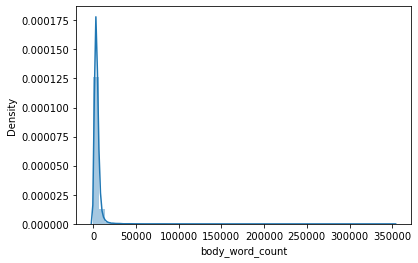

In [6]:
# Plotting a distribution plot for word count in body of the article
sns.distplot(df['body_word_count'])

/Users/deepaknadipelly/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


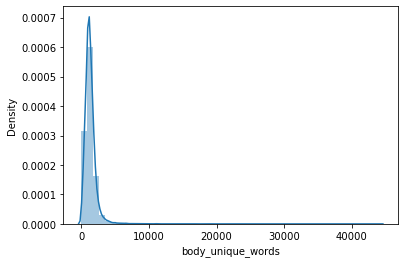

In [7]:
# Plotting a distribution plot for the unique word count in body of the article
sns.distplot(df['body_unique_words'])

In [8]:
df.drop_duplicates(['abstract', 'body_text'], inplace=True)
df['abstract'].describe(include='all')


count       40670
unique      40278
top       Unknown
freq           55
Name: abstract, dtype: object

In [9]:
# Viewing the stats on the dataset
df.describe()

publish_year  body_word_count  body_unique_words
count  46586.000000     46586.000000       46586.000000
mean    1823.244494      4394.686751        1349.997574
std      587.649594      7246.409041        1195.546773
min       -1.000000         1.000000           1.000000
25%     2006.000000      2173.000000         841.000000
50%     2014.000000      3427.000000        1188.000000
75%     2018.000000      5140.000000        1617.000000
max     2021.000000    351516.000000       44192.000000

In [10]:
# Checking for nulls
df.isna().sum()

paper_id                 0
body_text                0
methods              27206
results              29751
source                4379
title                 4414
doi                   5433
abstract              5916
publish_time          4379
authors               4995
journal               8070
arxiv_id             45965
url                   4497
publish_year             0
is_covid19               0
study_design             0
body_word_count          0
body_unique_words        0
dtype: int64

In [11]:
# Dropping columns that we do not need
df.drop(['arxiv_id','methods','results','journal'],axis=1,inplace=True)

In [12]:
# Dropping Null values
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36271 entries, 0 to 47091
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   paper_id           36271 non-null  object
 1   body_text          36271 non-null  object
 2   source             36271 non-null  object
 3   title              36271 non-null  object
 4   doi                36271 non-null  object
 5   abstract           36271 non-null  object
 6   publish_time       36271 non-null  object
 7   authors            36271 non-null  object
 8   url                36271 non-null  object
 9   publish_year       36271 non-null  int64 
 10  is_covid19         36271 non-null  bool  
 11  study_design       36271 non-null  object
 12  body_word_count    36271 non-null  int64 
 13  body_unique_words  36271 non-null  int64 
dtypes: bool(1), int64(3), object(10)
memory usage: 3.9+ MB


In [15]:
# Detecting Languages using the langdetect package
DetectorFactory.seed = 0
languages_list = []
for ii in tqdm(range(0,len(df))):
    text = df.iloc[ii]['body_text'].split(" ")
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        except Exception as e:
            
            try:
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    languages_list.append(lang)

100%|████████████████████████████████████| 36271/36271 [05:46<00:00, 104.58it/s]


In [17]:
# Counting the articles with language as the key. We can observe that most of the articles are in English
languages_dictionary = {}
for lang in set(languages_list):
    languages_dictionary[lang] = languages_list.count(lang)
print(languages_dictionary)

{'de': 5, 'en': 36233, 'it': 1, 'es': 13, 'cy': 4, 'ca': 1, 'ro': 1, 'fr': 13}


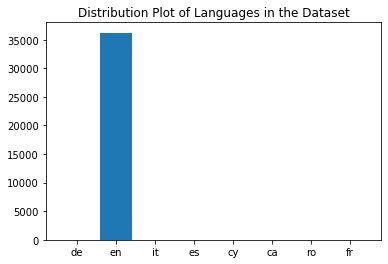

In [18]:
#Ploting the distribution plot of languages
df['language'] = languages_list
plt.bar(range(len(languages_dictionary)), list(languages_dictionary.values()), align='center')
plt.xticks(range(len(languages_dictionary)), list(languages_dictionary.keys()))
plt.title("Distribution Plot of Languages in the Dataset")
plt.show()

In [19]:
# Filtering the dataframe to keep articles of English Language only
df = df[df['language'] == 'en'] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36233 entries, 0 to 47091
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   paper_id           36233 non-null  object
 1   body_text          36233 non-null  object
 2   source             36233 non-null  object
 3   title              36233 non-null  object
 4   doi                36233 non-null  object
 5   abstract           36233 non-null  object
 6   publish_time       36233 non-null  object
 7   authors            36233 non-null  object
 8   url                36233 non-null  object
 9   publish_year       36233 non-null  int64 
 10  is_covid19         36233 non-null  bool  
 11  study_design       36233 non-null  object
 12  body_word_count    36233 non-null  int64 
 13  body_unique_words  36233 non-null  int64 
 14  language           36233 non-null  object
dtypes: bool(1), int64(3), object(11)
memory usage: 4.2+ MB


## Importing necessary packages for Preprocessing the text

In [42]:
from IPython.utils import io
with io.capture_output() as captured:
    !pip install scispacy
    !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_lg-0.5.0.tar.gz

In [21]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import scispacy
import spacy
import en_core_sci_lg
import string
from spacy.lang.en.stop_words import STOP_WORDS
from scipy.spatial.distance import jensenshannon
from IPython.display import HTML, display
!pip install ipywidgets
import ipywidgets as widgets
from os.path import isfile

In [23]:
#Printing out a few stopwords
punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:15]

['bottom',
 'else',
 'her',
 'a',
 'least',
 'another',
 'per',
 'itself',
 'other',
 'now',
 'an',
 'own',
 'along',
 'during',
 'next']

In [37]:
# Using scispacy package to perform preprocessing on the text to remove stopwords, punctuations and perform lemmatization
parser_func = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 6000000
def spacy_tokenizer(sentence):
    tokens = parser_func(sentence)
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    tokens = [word for word in mytokens if word not in stopwords and word not in punctuations ]
    tokens = " ".join([i for i in mytokens])
    return tokens

/Users/deepaknadipelly/opt/anaconda3/lib/python3.7/site-packages/spacy/util.py:833: UserWarning: [W095] Model 'en_core_sci_lg' (0.5.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.2.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [24]:
# Running the spacy tokenizer function and exporting the dataframe to csv because the preprocessing takes a lot of time to run
df["processed_text"] = df["body_text"].progress_apply(spacy_tokenizer)
df.to_csv("data_processed_csv")


In [24]:
# Reading in the exported file
df_processed=pd.read_csv("data_processed.csv")

In [5]:
# Printing the head of the dataframe
df_processed.head()

Unnamed: 0                                  paper_id  \
0           0  3cdc48bb9e40afd30a59463b7872761a726998c8   
1           1  d99acb4e99be7852aa61a688c9fbd38d44b5a252   
2           2  748d4c57fe1acc8d9d97cf574f7dea5296f9386c   
3           3  b891efc6e1419713b05ff7d89b26d260478c28df   
4           5  76d2990a2663635e195b8a9818f9664872b6d3af   

                                           body_text source  \
0  NDV (Roakin strain) was obtained from Dr. D. J...    PMC   
1  Live attenuated viruses have been developed an...    PMC   
2  Ebola virus (EBOV) and other members of the fa...    PMC   
3  To the Editor:\nChina has the world's second l...    PMC   
4  In 2008, over 2 million cases of cancer worldw...    PMC   

                                               title  \
0  Experimental Evaluation of Musca domestica (Di...   
1  Evaluation of Measles Vaccine Virus as a Vecto...   
2  Direct Visualization of Ebola Virus Fusion Tri...   
3  Tuberculosis prevention in healthcare workers ...   
4  Metagenomic Assay for Identification of Microb...   

                           doi  \
0     10.1093/jmedent/44.4.666   
1  10.2174/1874357901206010012   
2        10.1128/mbio.01857-15   
3  10.1183/23120541.00015-2015   
4        10.1128/mbio.01714-14   

                                            abstract publish_time  \
0  House flies, Musca domestica L. (Diptera: Musc...   2007-07-01   
1  Live attenuated recombinant measles vaccine vi...   2012-02-16   
2  Ebola virus (EBOV) makes extensive and intrica...   2016-02-09   
3  BSL3 and respiratory isolation wards protect h...   2015-08-21   
4  Screening for thousands of viruses and other p...   2014-09-16   

                                             authors  \
0  Watson, D. Wes; Niño, Elina L.; Rochon, Katery...   
1  Mok, Hoyin; Cheng, Xing; Xu, Qi; Zengel, James...   
2  Spence, Jennifer S.; Krause, Tyler B.; Mittler...   
3  Deng, Yunfeng; Li, Yan; Wang, Fengtian; Gao, D...   
4  Baldwin, Don A.; Feldman, Michael; Alwine, Jam...   

                                                 url  publish_year  \
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...          2007   
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...          2012   
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...          2016   
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...          2015   
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...          2014   

   is_covid19                                  study_design  body_word_count  \
0       False                                            []             2576   
1       False            ['truncated', 'gamma', 'protocol']             5208   
2       False                ['truncated', 'heterogeneity']             5423   
3       False                                            []             1073   
4       False  ['association', 'p-value', 'i2', 'protocol']             5655   

   body_unique_words language  \
0                929       en   
1               1497       en   
2               1965       en   
3                559       en   
4               1932       en   

                                      processed_text  
0  ndv roakin strain obtained dr. d. j. king sout...  
1  live attenuated viruses developed help protect...  
2  ebola virus ebov members family filoviridae en...  
3  editor china world second largest tuberculosis...  
4  2008 2 million cases cancer worldwide approxim...

## Vectorizing the articles

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
# Taking 10000 articles from the entire data for clustering purposes
text = df_processed['processed_text'][:10000].values
vectorizer = TfidfVectorizer(max_features=2 ** 11)
X = vectorizer.fit_transform(text)
X.shape


(10000, 2048)

## Dimensionality Reduction using Principal Component Analysis

In [27]:
# Performing dimensionality reduction using Principal Component Analysis. Taking components that capture 95% of the variance in the original data
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=10)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(10000, 1209)

In [28]:
# Checking the length of the components
li=np.cumsum(pca.explained_variance_ratio_)
final_components=[]
for i in li:
    if i<=0.95:
        final_components.append(i)
    else:
        break
len(final_components)


1208

## K-Means Clustering

In [29]:
# Performing K-means clustering on three different values for K
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
k_means50 = KMeans(n_clusters=50, random_state=42).fit(X_reduced)
k_means20 = KMeans(n_clusters=20, random_state=42).fit(X_reduced)
k_means30 = KMeans(n_clusters=30, random_state=42).fit(X_reduced)

In [56]:
# Finding distortion for various K values to plot as an elbow plot
distortions_list= []
distortions_list.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
K = [10,20,30,40,50]
for k in K
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions_list.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

[0.8066134288130717, 0.7749795568438997, 0.7536609719556964, 0.7397364766841974, 0.7286202002381938]


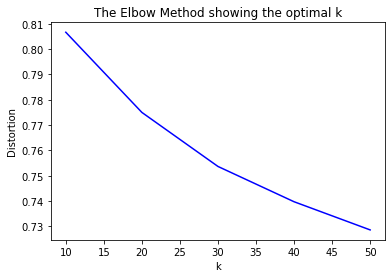

In [78]:
# Plotting the elbow plot
print(distortions)
X_line = K
Y_line = [distortions]
plt.plot(K, distortions, 'b-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [30]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [135]:
# Silhouette Score for K-means with K=30
print("Silhouette Score for K-Means Clustering is:",silhouette_score(X_reduced,k_means30.labels_))
print("Davies Bouldin Score for K-Means Clustering is:",davies_bouldin_score(X_reduced,k_means30.labels_))

Silhouette Score for K-Means Clustering is: 0.07267476833829357
Davies Bouldin Score for K-Means Clustering is: 1.3606865220591242


In [32]:
# Performing Density based Spatial Clustering of applications with Noise
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.85)
y_dbs = dbs.fit_predict(X_reduced)

In [33]:
pd.DataFrame(y_dbs).value_counts()

 0     5850
-1     3874
 2       23
 11      17
 4       16
 15      16
 1       15
 8       15
 18      12
 12      12
 10      11
 13      10
 17       9
 31       7
 23       6
 14       6
 32       6
 5        6
 30       6
 21       6
 25       5
 33       5
 29       5
 28       5
 27       5
 9        5
 24       5
 7        5
 22       5
 20       5
 19       5
 3        5
 16       5
 6        5
 34       4
 26       3
dtype: int64

In [138]:
# DBSCAN Performed bad compared to K-Means
print("Silhouette Score for DBSCAN is:",silhouette_score(X_reduced,y_dbs))
print("Davies Bouldin Score for DBSCAN is:",davies_bouldin_score(X_reduced,y_dbs))

Silhouette Score for DBSCAN is: -0.06616153145756135
Davies Bouldin Score for DBSCAN is: 2.5175296140726733


## K-Medoids

In [41]:
# Implementing the K-Medoids Algorithm
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=30, random_state=0).fit(X_reduced)
kmedoids.labels_

array([ 4,  8,  4, ..., 11, 11,  4])

In [144]:
print("silhouette score for K-Medoids is:",silhouette_score(X_reduced,kmedoids.labels_))
print("Davies Bouldin Score for K-Medoids Clustering is:",davies_bouldin_score(X_reduced,kmedoids.labels_))

silhouette score for K-Medoids is: 0.030213597804426277
Davies Bouldin Score for K-Medoids Clustering is: 1.9237468428850948


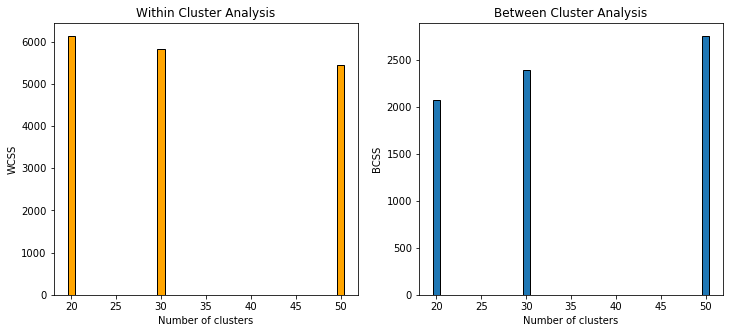

In [97]:
# Performing Within Cluster and Between cluster Analysis
models = [k_means50, k_means20, k_means30]
def within_and_between(models, X_reduced):
    fig, ax = plt.subplots(1, 2, figsize=(11,5))
    wcss = [mod.inertia_ for mod in models]
    n_clusts = [50,20,30]
    ax[0].bar(n_clusts, wcss,color='orange')
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('WCSS')
    ax[0].set_title('Within Cluster Analysis')
    n_1 = (float(X_reduced.shape[0]) * float(X_reduced.shape[1])) - 1.0
    tss = n_1 * np.var(X_reduced)
    bcss = [tss - x for x in wcss]
    ax[1].bar(n_clusts, bcss)
    ax[1].set_xlabel('Number of clusters')
    ax[1].set_ylabel('BCSS')
    ax[1].set_title('Between Cluster Analysis')
    plt.show()
within_and_between(models,X_reduced)

## Spectral Clustering

In [43]:
# Implementing Spectral Clustering
from sklearn.cluster import SpectralClustering
clustering=SpectralClustering(n_clusters=30).fit(X_reduced)

In [154]:
# Spectral Clustering showed some improvement in performance
print("Silhouette Score for Spectral Clustering:",silhouette_score(X_reduced,clustering.labels_))
print("Davies Bouldin Score for Spectral Clustering is:",davies_bouldin_score(X_reduced,clustering.labels_))

Silhouette Score for Spectral Clustering: 0.11286490102352889
Davies Bouldin Score for Spectral Clustering is: 1.3288469631481714


## Gaussian Mixture Models

In [48]:
# Implementing Soft Clustering Using Gaussian Mixture Models
from sklearn.mixture import GaussianMixture
emgm = GaussianMixture(n_components=30)
emgm.fit(X_reduced)
labels_gm = emgm.predict(X_reduced)

In [152]:
# Gaussian Mixture Models Gave the highest silhouette score
print("Silhouette Score for Gaussian Mixture Models:",silhouette_score(X_reduced,labels_gm))
print("Davies Bouldin Score for Gaussian Mixture Models is:",davies_bouldin_score(X_reduced,labels_gm))


Silhouette Score for Gaussian Mixture Models: 0.14836118096961962
Davies Bouldin Score for Gaussian Mixture Models is: 1.285991163648109


## T-Distributed Stochastic Neighbourhood Embedding

In [56]:
# Implementing TSNE for visualization
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=110, random_state=12)
X_embedded = tsne.fit_transform(X_reduced)

/Users/deepaknadipelly/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/deepaknadipelly/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 331 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.016s...
[t-SNE] Computed neighbors for 10000 samples in 6.673s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.336124
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.500740
[t-SNE] KL divergence after 1000 iterations: 1.754319


/Users/deepaknadipelly/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


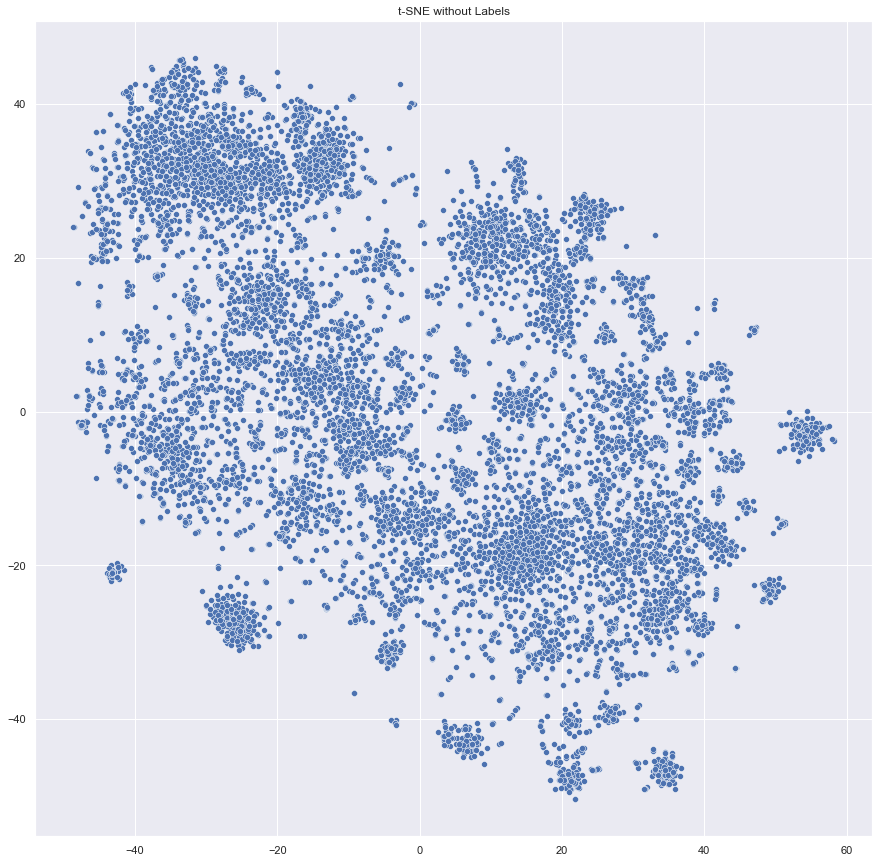

In [57]:
sns.set(rc={'figure.figsize':(15,15)})
colors_palette = sns.color_palette("bright", 1)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=colors_palette)
plt.title('t-SNE without Labels')
plt.show()

/Users/deepaknadipelly/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


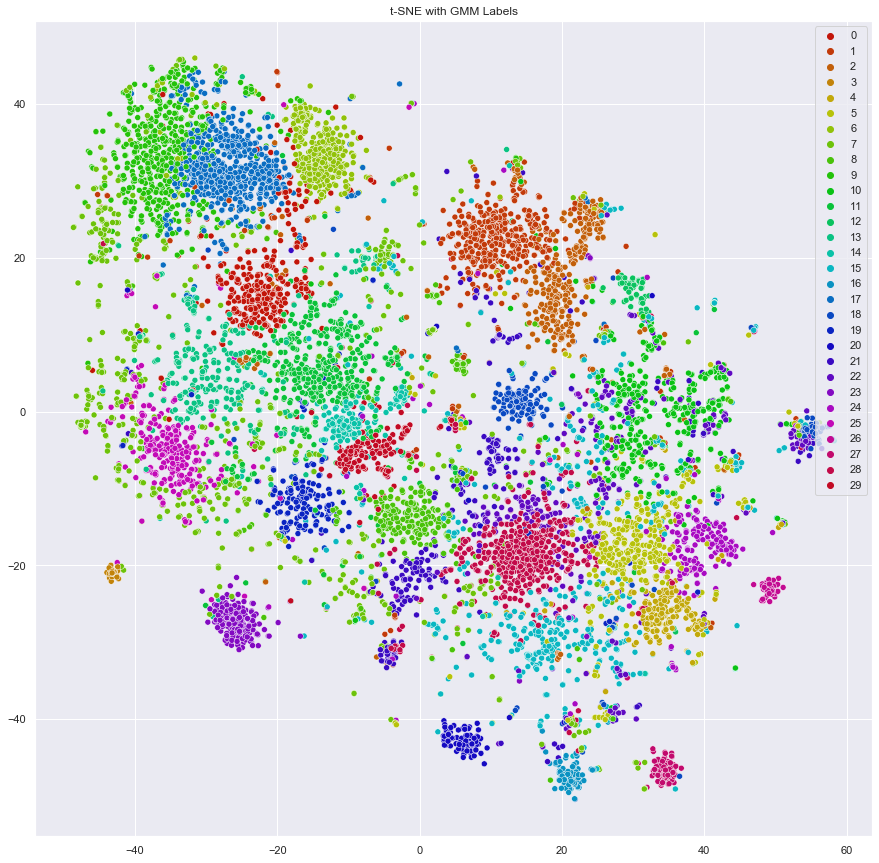

In [58]:
# T-SNE Plot for Gausian Mixture Model
%matplotlib inline
sns.set(rc={'figure.figsize':(15, 15)})
colors_palette = sns.hls_palette(30, l=.4, s=.9)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels_gm, legend='full', palette=colors_palette)
plt.title('t-SNE with GMM Labels')
plt.show()

/Users/deepaknadipelly/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


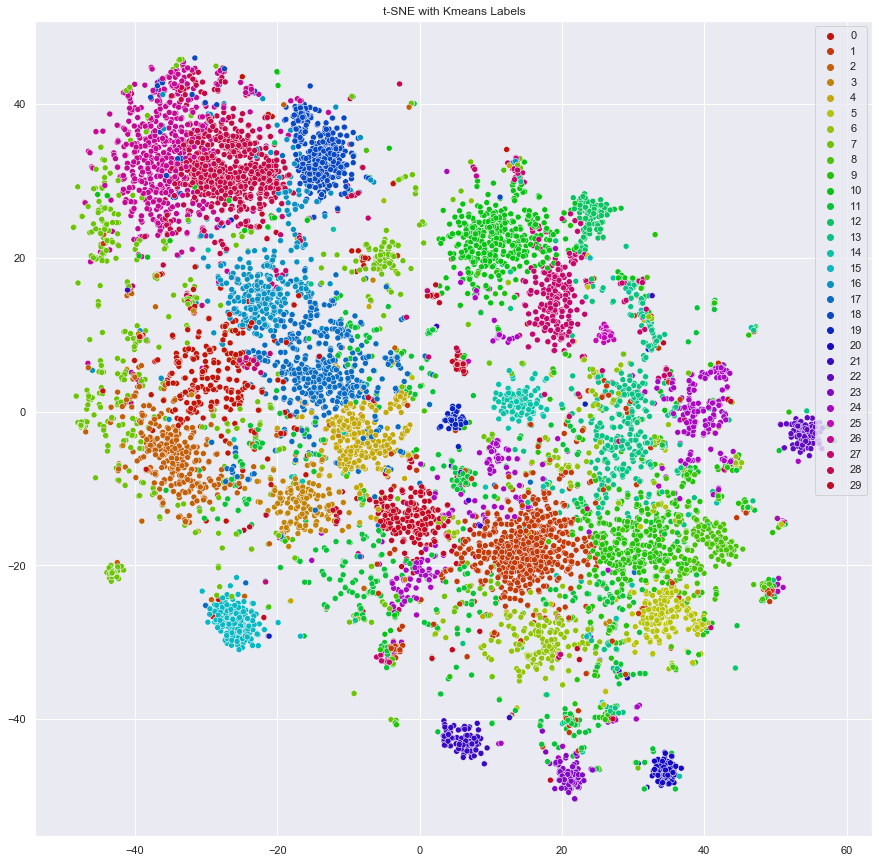

In [59]:
# T-SNE Plot with K-Means Labels
%matplotlib inline
sns.set(rc={'figure.figsize':(15, 15)})
palette = sns.hls_palette(30, l=.4, s=.9)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=k_means30.labels_, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.show()

## Performing Topic Modeling Using Latent Dirichlet Allocation

In [60]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vectorizers = []
for ii in range(0, 20):
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [17]:
df_processed['y'].value_counts()

5     5826
7     3297
18    3113
3     3108
8     2660
2     2522
16    2456
4     2031
0     2005
12    1935
6     1421
19    1261
14    1043
13     784
17     559
1      556
11     507
9      484
10     444
15     221
Name: y, dtype: int64

In [18]:
vectorized_data = []
for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df_processed.loc[df_processed['y'] == current_cluster, 'processed_text']))
    except Exception as e:
        vectorized_data.append(None)

In [19]:
lda_models = []
for ii in range(0, 20):
    lda = LatentDirichletAllocation(n_components=20, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)    
lda_models[0]

LatentDirichletAllocation(learning_method='online', n_components=20,
                          random_state=42, verbose=False)

In [61]:
clusters_lda_data = []
for current_cluster, lda in enumerate(lda_models):
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

In [21]:
# Functions for printing keywords from each topic
def lda_topics(model, vectorizer, top_n=3):
    words = []
    keywords = []
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in words:
                keywords.append(word)
                words.append(word[0])           
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    values_returned = []
    for ii in keywords:
        values_returned.append(ii[0])
    return values_returned


In [62]:
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(lda_topics(lda, vectorizers[current_vectorizer]))

In [23]:
# Writing the topics to a text file
f=open('lda_topics.txt','w')
count = 0
for ii in all_keywords:
    if vectorized_data[count] != None:
        f.write(', '.join(ii) + "\n")
    else:
        f.write(', '.join(ii) + "\n")
    count += 1
f.close()

In [35]:
f=open('lda_topics.txt','r')

In [36]:
topics=f.read()

In [39]:
li=topics.split("\n")

In [41]:
len(li)

21

In [61]:
# Printing the keywords from each topic
for i in range(len(li)-1):
    print("Topic{}:\n{}\n ".format(i,li[i]))

Topic0:
patients, model, medrxiv, covid-, cells, fig, expression, wuhan, transmission, posted, april, version, studies, protein, testing, sequences, positive, genome, test, peer-reviewed, sars-cov-, age, study, license, influenza, participants, masks, infection, biorxiv, mask, network, regions, italian, women, work, article, government, pregnant, airborne, child, droplets, anaerobic, haemoglobin, categorised, cases, number
 
Topic1:
felv, cells, samples, fiv, study, fipv, fcov, type, dogs, fip, vaccine, kittens, shelter, species, animal, domestic, agp, vaccines, challenge, wild, oral, treatment, improvement, bladder, bronchiolar, propofol, coronavirus-specific, masked, granulomas, tbs, henselae, cfu, clinical, serum, blood, fagp, positive, signs, pcr
 
Topic2:
study, pneumonia, viral, group, virus, infections, treatment, cap, bacterial, icu, asthma, care, cells, ards, levels, transplant, lung, ventilation, recipients, hospital, infection, transplantation, pulmonary, nasal, blood, diarr

## Plotting the WordCloud

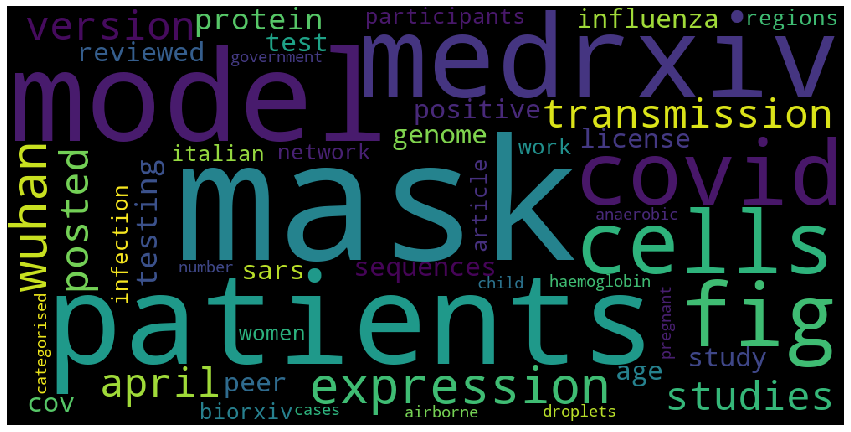

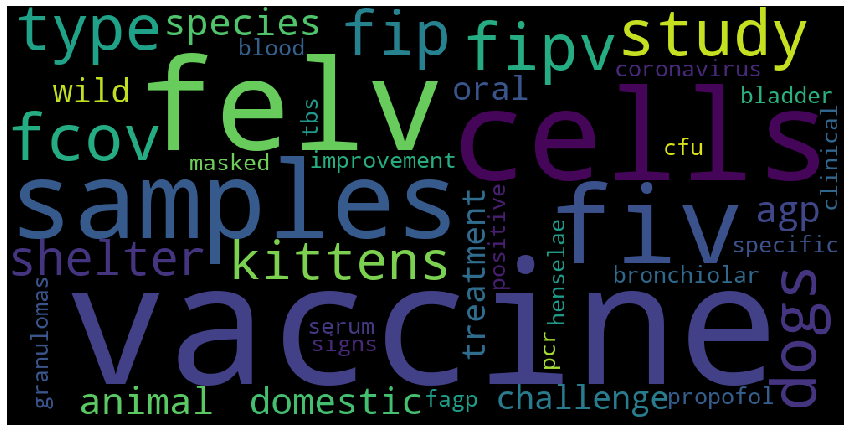

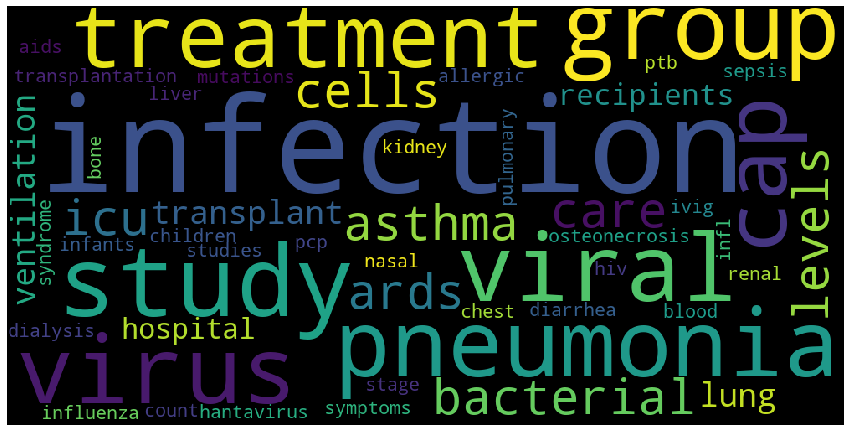

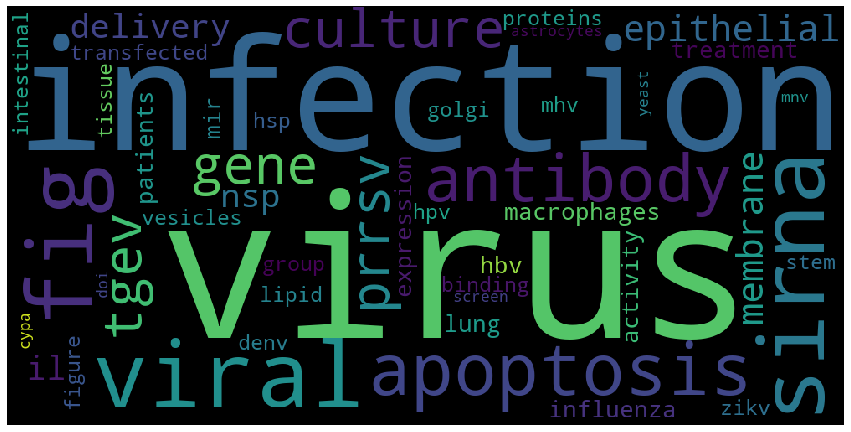

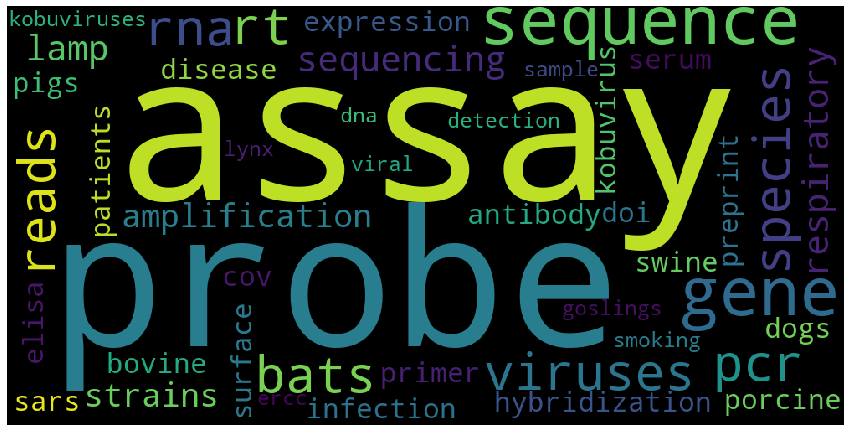

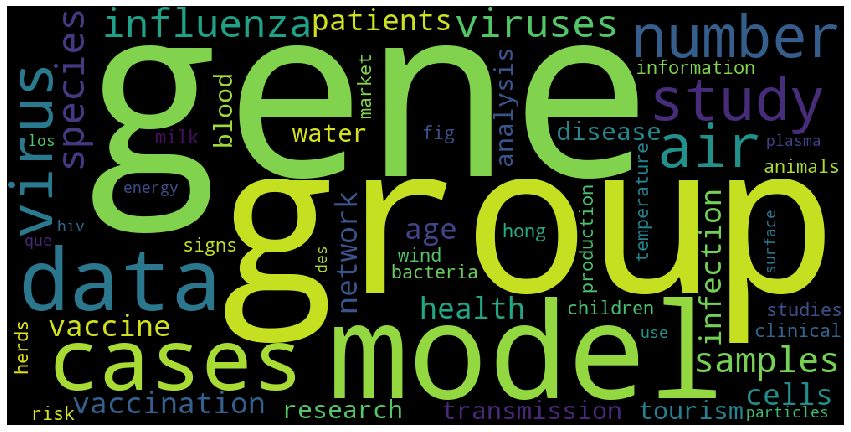

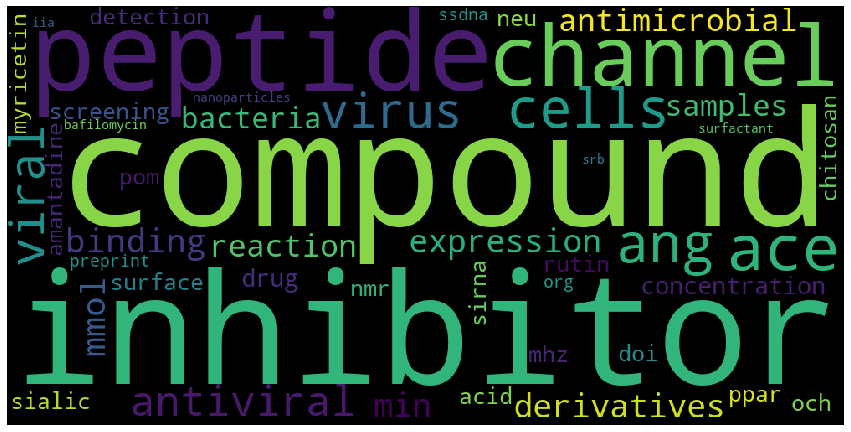

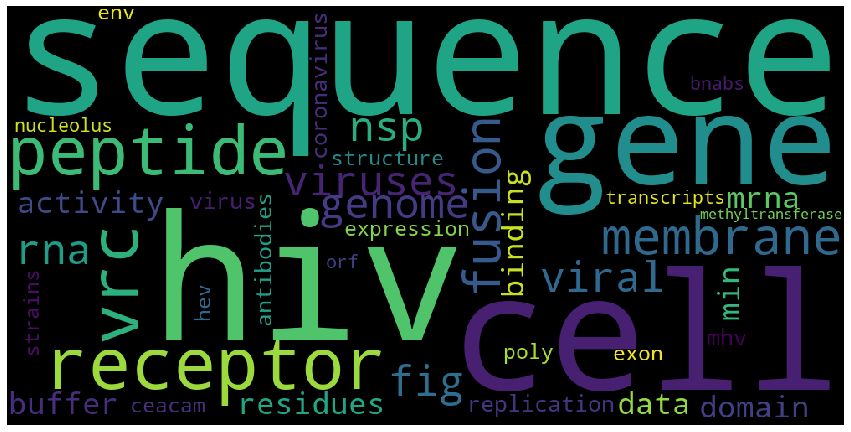

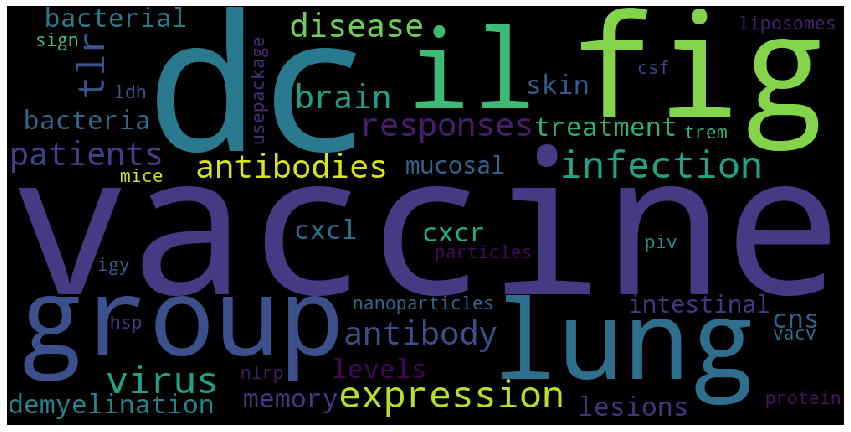

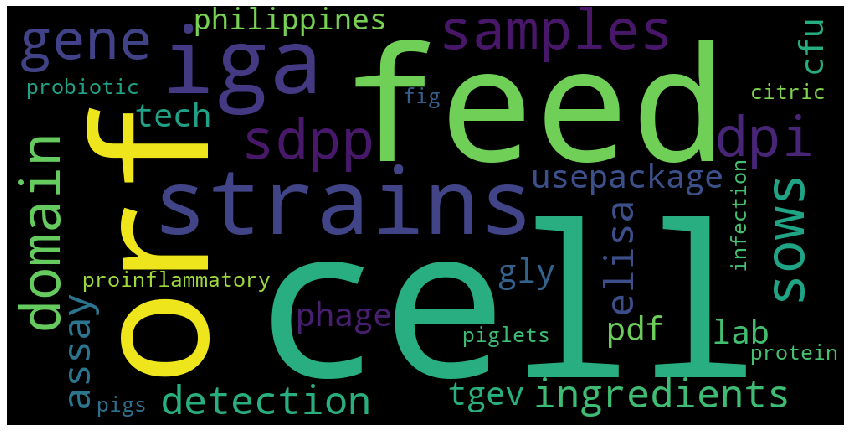

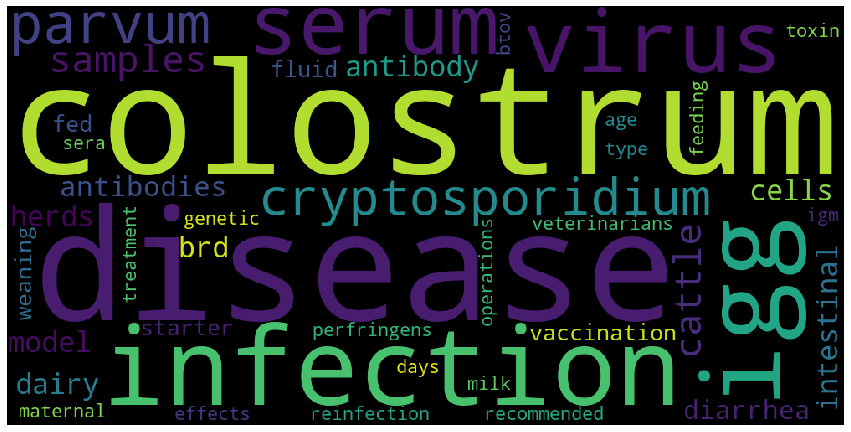

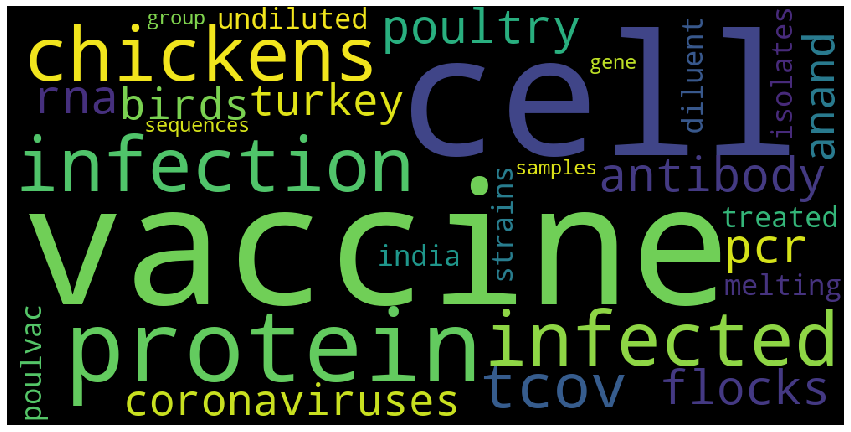

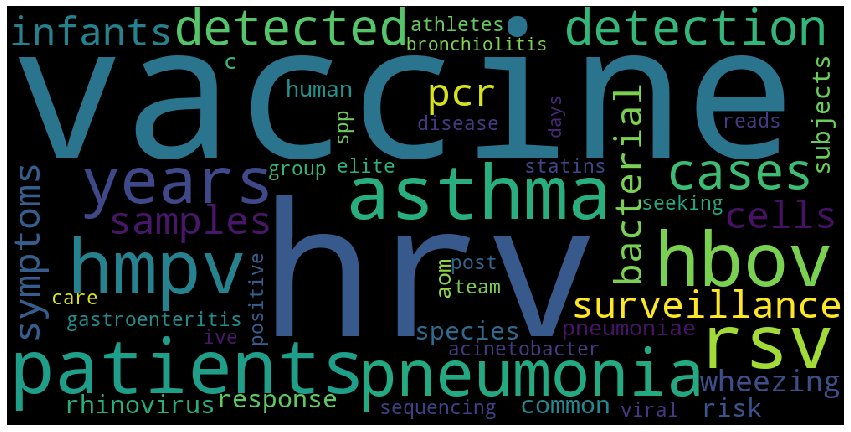

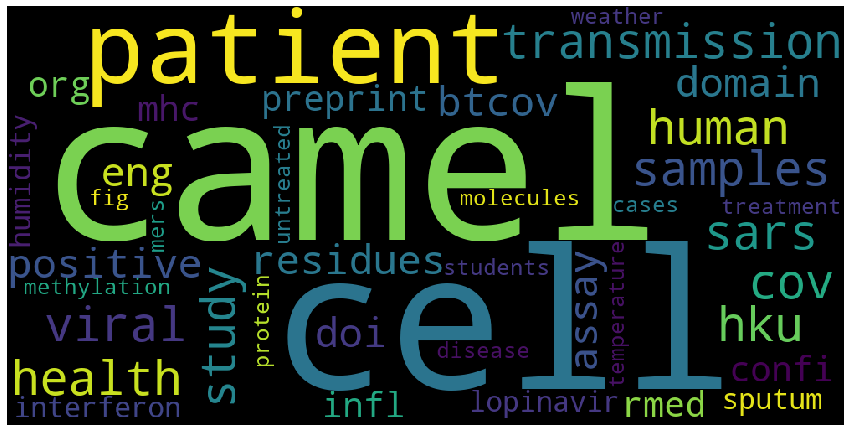

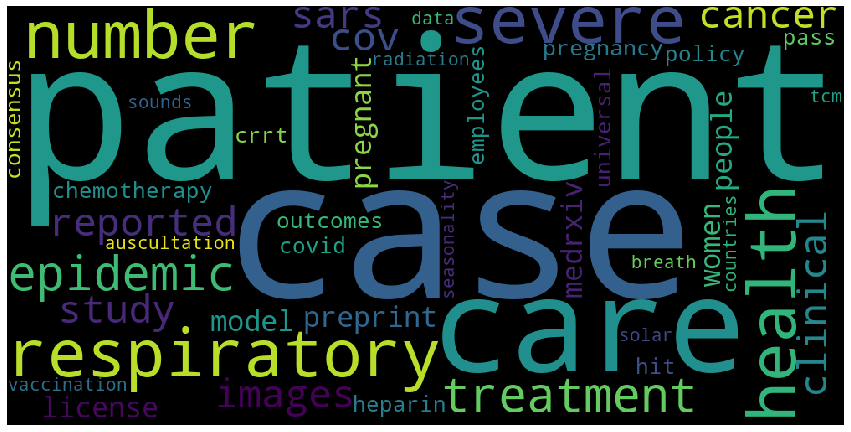

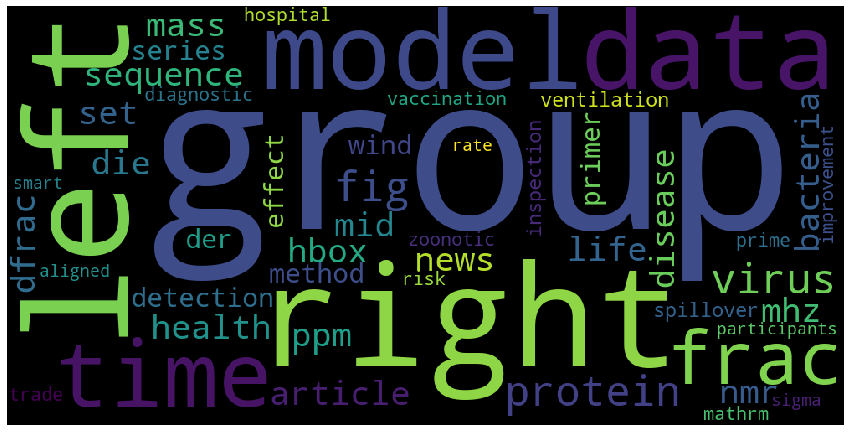

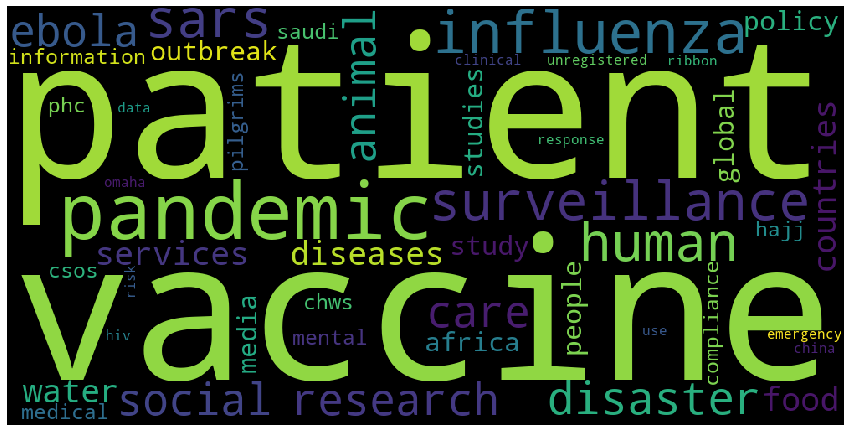

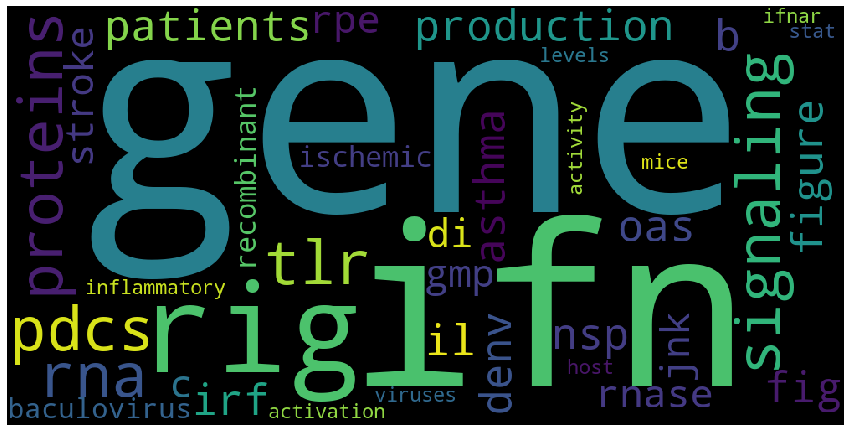

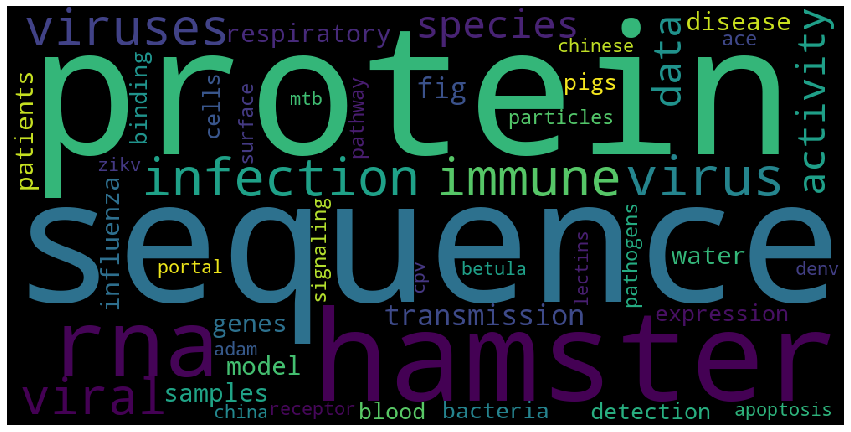

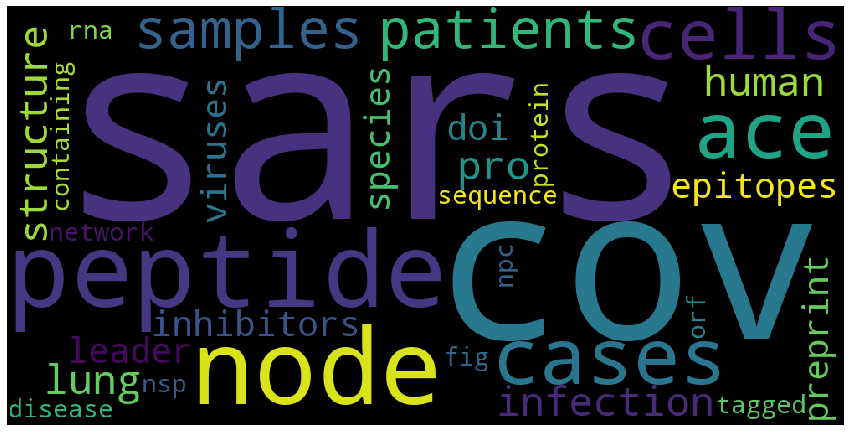

In [71]:
# Plotting the Wordcloud
for i in range(len(li)-1):
    my_list=li[i].split(",")
    unique_string=(" ").join(my_list)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.show()
    plt.close()

In [69]:
# Importing the vectorized file
doc_topic_vect=pd.read_csv('doc_topic_dist.csv')

In [70]:
# Printing the head of the dataframe
doc_topic_vect.head()

0         1         2         3         4         5         6  \
0  0.000014  0.000014  0.000014  0.000014  0.000014  0.000014  0.000014   
1  0.000007  0.068827  0.000007  0.000007  0.000007  0.000007  0.029520   
2  0.042444  0.015515  0.000007  0.000007  0.030645  0.000007  0.000007   
3  0.000031  0.000031  0.093911  0.000031  0.000031  0.000031  0.013272   
4  0.000038  0.011904  0.000038  0.000038  0.000038  0.000038  0.000038   

          7         8         9  ...        40        41        42        43  \
0  0.000014  0.000014  0.000014  ...  0.322831  0.000014  0.000014  0.000014   
1  0.035590  0.000007  0.000007  ...  0.000007  0.051670  0.000007  0.000007   
2  0.000007  0.150879  0.012120  ...  0.000007  0.011243  0.002008  0.000007   
3  0.000031  0.000031  0.000031  ...  0.000031  0.000031  0.000031  0.003760   
4  0.000038  0.000038  0.000038  ...  0.000038  0.000038  0.000038  0.000038   

         44        45        46        47        48        49  
0  0.000014  0.000014  0.000014  0.009759  0.000014  0.201816  
1  0.000007  0.000007  0.000007  0.061351  0.000007  0.319316  
2  0.000007  0.000007  0.000007  0.001363  0.000007  0.000007  
3  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031  
4  0.000038  0.000038  0.241437  0.000038  0.000038  0.000038  

[5 rows x 50 columns]

## Return Similar Documents

In [66]:
from scipy.spatial import distance
from scipy.spatial.distance import jensenshannon,cosine,euclidean

In [92]:
# Checking if the documents are related to covid-19
is_covid19 = df_processed.body_text.str.contains('COVID-19|SARS-CoV-2|2019-nCov|SARS Coronavirus 2|2019 Novel Coronavirus')

In [122]:
# Function to return similar documents
def get_similar_docs(doc_dist, k, lower=1950, upper=2020, only_covid19=False, get_dist=False,func="euclidean"):
    relevant_time = df.publish_year.between(lower, upper)
    if only_covid19:
        temp = doc_topic_dist[relevant_time & is_covid19]    
    else:
        temp = doc_topic_dist[relevant_time]     
    if(func=="euclidean"):
        distances = temp.apply(lambda x: euclidean(x, doc_dist), axis=1)
    elif(func=="cosine"):
        distances = temp.apply(lambda x: cosine(x, doc_dist), axis=1)
    else:
        distances = temp.apply(lambda x: jensenshannon(x, doc_dist), axis=1)
        
    k_nearest = distances[distances != 0].nsmallest(n=k).index
    if get_dist:
        k_distances = distances[distances != 0].nsmallest(n=k)
        return k_nearest, k_distances
    else:
        return k_nearest

In [126]:
# Articles to recommend
def articles_to_recommend(paper_id, k, lower=1950, upper=2020, only_covid19=False,func="cosine"):
    print(df.title[df.paper_id == paper_id].values[0])
    recommended, dist = get_similar_docs(doc_topic_dist[df.paper_id == paper_id].iloc[0], k, lower, upper, only_covid19, get_dist=True,func="cosine")
    recommended = df.iloc[recommended].copy()
    recommended['similarity'] = 1 - dist 
    h = '<br/>'.join(['<a href="' + l + '" target="_blank">'+ n + '</a>' +' (Similarity: ' + "{:.2f}".format(s) + ')' for l, n, s in recommended[['url','title', 'similarity']].values])
    display(HTML(h))
    
    

In [132]:
# Using Euclidean distance
articles_to_recommend('d99acb4e99be7852aa61a688c9fbd38d44b5a252', k=15,func="euclidean")

Evaluation of Measles Vaccine Virus as a Vector to Deliver Respiratory Syncytial Virus Fusion Protein or Epstein-Barr Virus Glycoprotein gp350


In [131]:
# Using Cosine function as a measure of similarity
articles_to_recommend('d99acb4e99be7852aa61a688c9fbd38d44b5a252', k=15,func="cosine")

Evaluation of Measles Vaccine Virus as a Vector to Deliver Respiratory Syncytial Virus Fusion Protein or Epstein-Barr Virus Glycoprotein gp350


In [130]:
# Using Jensen Shannon Distance
articles_to_recommend('d99acb4e99be7852aa61a688c9fbd38d44b5a252', k=15,func="jensenshannon")

Evaluation of Measles Vaccine Virus as a Vector to Deliver Respiratory Syncytial Virus Fusion Protein or Epstein-Barr Virus Glycoprotein gp350
